In [1]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.metrics import log_loss, mean_squared_error, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [82]:
class SGDRegressor(BaseEstimator):
    def __init__(self, eta: float = 1e-3, n_epochs: int = 3):
        self.eta = eta
        self.n_epochs = n_epochs
        self.mse_ = list()
        self.weights_ = list() # learning weights

    def fit(self, X: np.ndarray, y: np.array):

        self.w_ = np.zeros(X.shape[1]+1)
        for epoch_id in range(self.n_epochs):
            mse = 0
            for row, target in zip(X, y):
                gradient_w0 = -(target - (self.w_[0] + self.w_[1] * row[0]))
                gradient_w1 = -(target - (self.w_[0] + self.w_[1] * row[0])) * row[0]

                self.w_[0] = self.w_[0] - gradient_w0 * self.eta
                self.w_[1] = self.w_[1] - gradient_w1 * self.eta

                mse += (target - (self.w_[0] + self.w_[1] * row[0])) ** 2

            mse /= len(X)

            print(f"Epoch_id = {epoch_id}, mse: {mse}, weights: {self.w_}")
            self.mse_.append(mse)
            self.weights_.append(self.w_)

        return self

    def predict(self, X):
        predicted_target = []
        for row in X:
            predicted_target.append(self.w_[0] + self.w_[1] * row[0])

        return predicted_target

In [80]:
# for Jupyter-book, we copy data from GitHub, locally, to save Internet traffic,
# you can specify the data/ folder from the root of your cloned
# https://github.com/Yorko/mlcourse.ai repo, to save Internet traffic
DATA_PATH = "https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/"

In [50]:
data_demo = pd.read_csv(DATA_PATH + "weights_heights.csv")

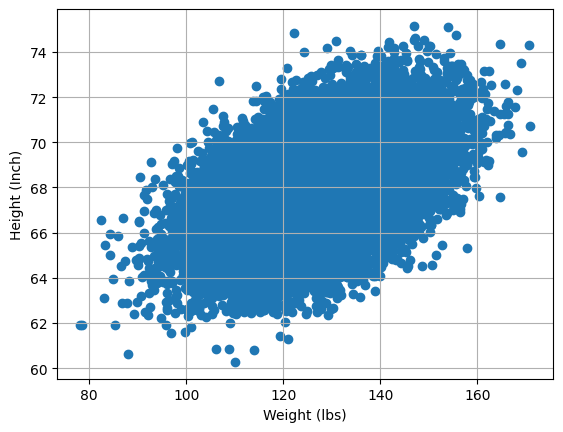

In [51]:
plt.scatter(data_demo["Weight"], data_demo["Height"])
plt.xlabel("Weight (lbs)")
plt.ylabel("Height (Inch)")
plt.grid();

In [73]:
X, y = data_demo["Weight"].values, data_demo["Height"].values
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=17
)

In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape([-1, 1]))
X_valid_scaled = scaler.transform(X_valid.reshape([-1, 1]))

In [83]:
sgd_regressor = SGDRegressor(n_epochs=4)
sgd_regressor.fit(X_train_scaled, y_train)

Epoch_id = 0, mse: 134.39578466589035, weights: [68.0379205   0.91137808]
Epoch_id = 1, mse: 2.7067079196334562, weights: [68.03792218  0.91137811]
Epoch_id = 2, mse: 2.7067079243207517, weights: [68.03792218  0.91137811]
Epoch_id = 3, mse: 2.7067079243207517, weights: [68.03792218  0.91137811]


SGDRegressor(n_epochs=4)

SKlearn linear regression

In [70]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_predicted = lr_model.predict(X_valid_scaled)
print(f"SKLearn MSE: {mean_squared_error(y_valid, y_predicted)}, coefficients: {lr_model.coef_}, intercept: {lr_model.intercept_}")

SKLearn MSE: 2.670830767667635, coefficients: [0.94537278], intercept: 67.98930834742858


In [78]:
linreg_holdout_mse = mean_squared_error(y_valid, lr_model.predict(X_valid_scaled))
sgd_holdout_mse = mean_squared_error(y_valid, sgd_regressor.predict(X_valid_scaled))

try:
    assert (sgd_holdout_mse - linreg_holdout_mse) < 1e-4
    print("Correct!")
except AssertionError:
    print(
        "Something's not good.\n Linreg's holdout MSE: {}"
        "\n SGD's holdout MSE: {}".format(linreg_holdout_mse, sgd_holdout_mse)
    )

Something's not good.
 Linreg's holdout MSE: 2.670830767667635
 SGD's holdout MSE: 2.6758568913046146
